In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
df = pd.read_csv(url, names = column_names)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
import pandas as pd
import numpy as np

data_array = df.to_numpy()

In [3]:
print("Shape dari dataset,", data_array.shape)
print("Size dari dataset:", data_array.size)

Shape dari dataset, (150, 5)
Size dari dataset: 750


In [4]:
import pandas as pd

setosa =df[df['species'] == 'Iris-setosa']
versicolor = df[df['species'] == 'Iris-versicolor']
virginica = df[df['species'] == 'Iris-virginica']

In [5]:
setosa_to_csv = setosa.to_csv('setosa.csv', index=False)
versicolor_to_csv = versicolor.to_csv('versicolor.csv', index=False)
virginica_to_csv = virginica.to_csv('virginica.csv', index=False)

In [6]:
np.save('setosa.npy', setosa.to_numpy())
np.save('versicolor.npy', versicolor.to_numpy())
np.save('virginica.npy', virginica.to_numpy())

In [7]:
np.savez(
    'bunga_dataset.npz',
    setosa=setosa.to_numpy(),
    versicolor=versicolor.to_numpy(),
    virginica=virginica.to_numpy(),
)

In [8]:
print("Size setosa:", setosa.size)
print("Size versicolor:", versicolor.size)
print("Size virgincia:", virginica.size)

Size setosa: 250
Size versicolor: 250
Size virgincia: 250


a. Ada berapa kelas bunga? 1/2/3/..?  

1.   setosa
2.   versicolor
3.   virgincia

b. Apakah nama bunga-bunga berdasarkan kelasnya?

1.   setosa
2.   versicolor
3.   virgincia

c. Berapa size dari setiap kelas bunga? Size setosa: 250, Size versicolor: 250, Size virgincia: 250

In [9]:
iris_setosa = np.load('setosa.npy', allow_pickle=True)
iris_versicolor = np.load('versicolor.npy', allow_pickle=True)
iris_virginica = np.load('virginica.npy', allow_pickle=True)

2. Format manakah yang paling kecil tempat penyimpananya?

*   setosa = 1,458 b
*   versicolor = 1,658 b
*   virgincia = 1,608 b
*   yang paling kecil adalah setosa


3. Mengapa?
*   karena setosa mempunyai ruang penyimpanan yang terkecil di antara versicolor, virgincia.






<Axes: >

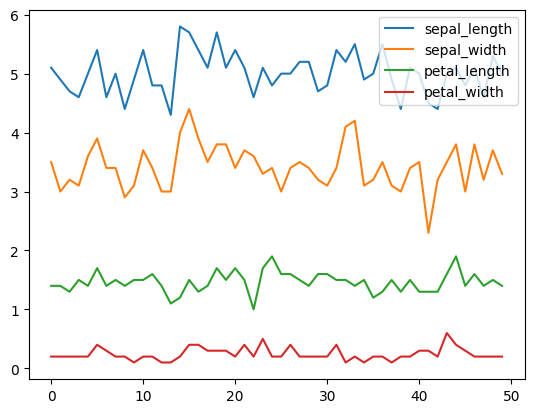

In [10]:
setosa.plot()

<Axes: >

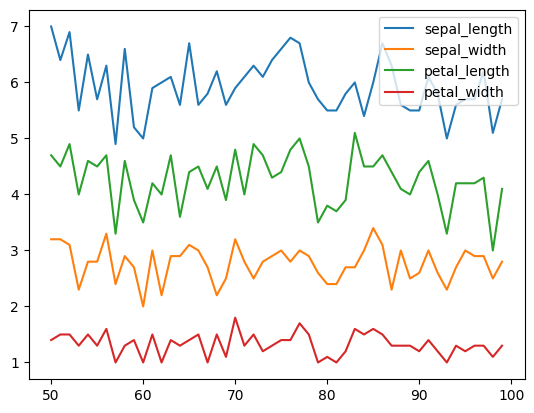

In [11]:
versicolor.plot()

<Axes: >

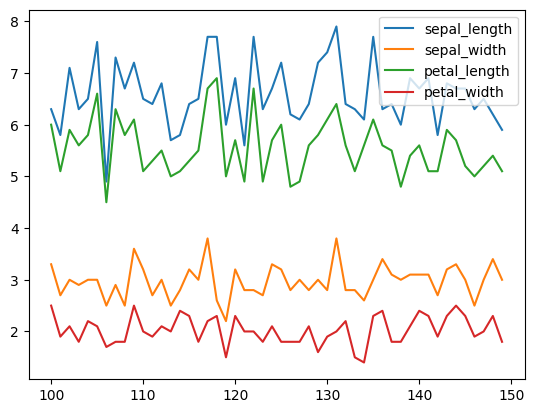

In [12]:
virginica.plot()

In [17]:
def min_max_normalize(data):
  min_vals = data[:, :4].min(axis=0)
  max_vals = data[:, :4].max(axis=0)
  normalized = (data[:, :4] - min_vals) / (max_vals - min_vals)
  return normalized

norm_setosa = min_max_normalize(iris_setosa)
norm_versicolor = min_max_normalize(iris_versicolor)
norm_virginica = min_max_normalize(iris_virginica)

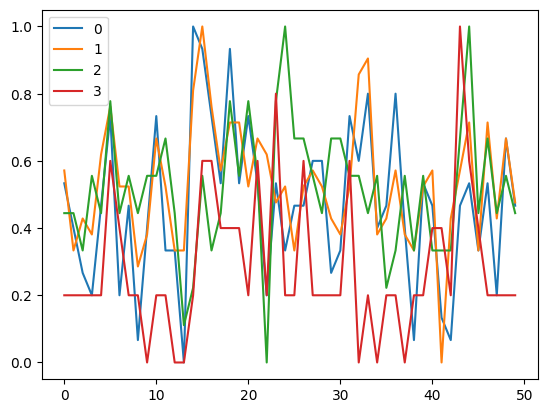

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming norm_setosa is your normalized NumPy array
# Convert norm_setosa to a Pandas DataFrame for plotting
norm_setosa_df = pd.DataFrame(norm_setosa)

# Plot the DataFrame
norm_setosa_df.plot()
plt.show()

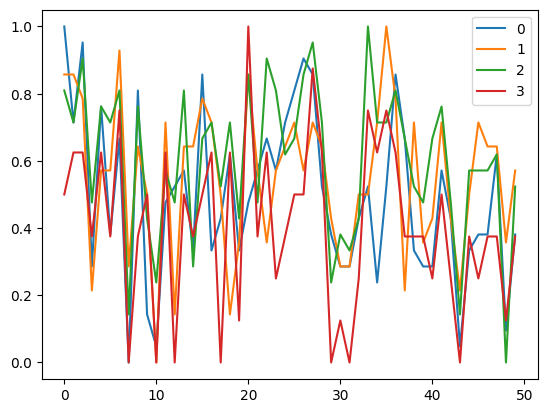

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming norm_setosa is your normalized NumPy array
# Convert norm_setosa to a Pandas DataFrame for plotting
norm_versicolor_df = pd.DataFrame(norm_versicolor)

# Plot the DataFrame
norm_versicolor_df.plot()
plt.show()

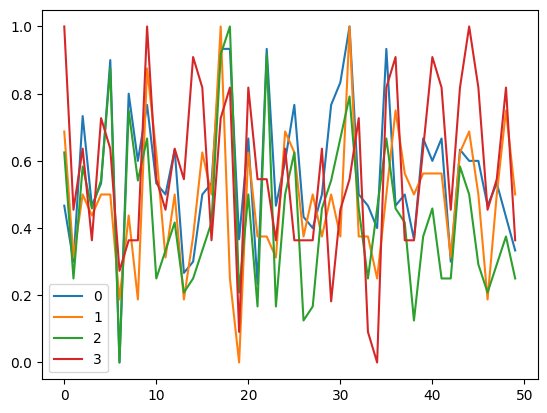

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming norm_setosa is your normalized NumPy array
# Convert norm_setosa to a Pandas DataFrame for plotting
norm_virginica_df = pd.DataFrame(norm_virginica)

# Plot the DataFrame
norm_virginica_df.plot()
plt.show()

In [21]:
combined_data = np.vstack([
    np.hstack([norm_setosa, np.full((norm_setosa.shape[0], 1), 1)]),
    np.hstack([norm_versicolor, np.full((norm_versicolor.shape[0], 1), 1)]),
    np.hstack([norm_virginica, np.full((norm_virginica.shape[0], 1), 2)]),
])

In [22]:
topik3 = pd.DataFrame(combined_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [23]:
topik3.to_csv('percobaan3_622023007.csv', index=False)

In [24]:
np.savez(
    'percobaan3_622023007.npz',
    setosa=norm_setosa_df.to_numpy(),
    versicolor=norm_versicolor_df.to_numpy(),
    virginica=norm_virginica_df.to_numpy(),
)

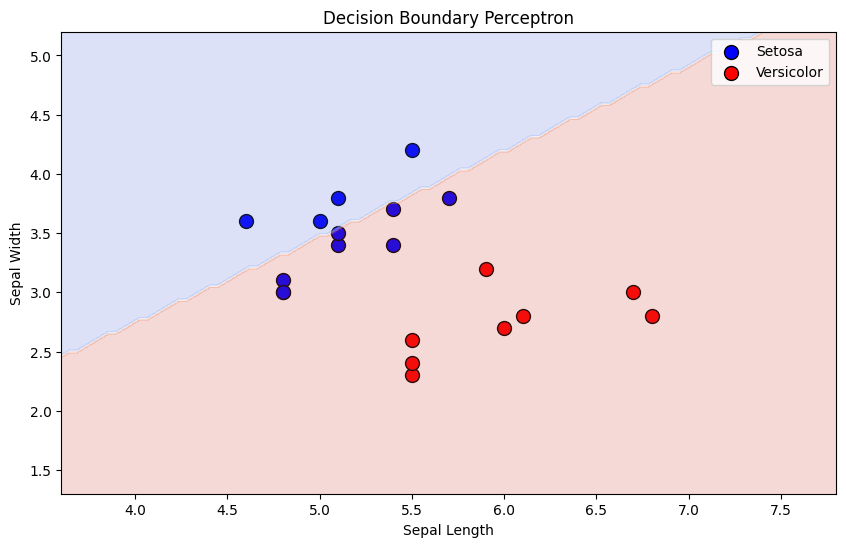

In [29]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# URL dataset Iris
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Nama kolom dataset
kolom_nama = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Membaca dataset dan menyimpannya dalam DataFrame
df = pd.read_csv(dataset_url, names=kolom_nama)

# Memilih dua kelas saja: Setosa dan Versicolor
df = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Mengubah label menjadi angka: Setosa = 0, Versicolor = 1
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Menentukan fitur (Sepal Length dan Sepal Width) dan target (species)
X = df[['sepal_length', 'sepal_width']].values
y = df['species'].values

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kelas Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        # Inisialisasi learning rate, epoch, bobot, dan bias
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Mendapatkan jumlah sampel dan fitur
        n_samples, n_features = X.shape
        # Inisialisasi bobot dan bias dengan nol
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Melakukan iterasi sebanyak epoch
        for _ in range(self.epochs):
            # Iterasi untuk setiap sampel
            for idx, x_i in enumerate(X):
                # Menghitung output linear
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Menggunakan fungsi aktivasi (step function)
                y_predicted = self.activation_function(linear_output)
                # Menghitung update bobot dan bias
                update = self.lr * (y[idx] - y_predicted)
                # Update bobot dan bias
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        # Fungsi aktivasi: Mengembalikan 1 jika x >= 0, jika tidak maka 0
        return 1 if x >= 0 else 0

    def predict(self, X):
        # Menghitung output linear untuk semua sampel
        linear_output = np.dot(X, self.weights) + self.bias
        # Menggunakan fungsi aktivasi untuk setiap output
        return np.array([self.activation_function(x) for x in linear_output])

# proses filterisasi menyebabkan sebagian data hilang
# Inisialisasi Perceptron dengan learning rate 0.1 dan epoch 10
perceptron = Perceptron(learning_rate=0.1, epochs=10)
# Melatih model menggunakan data latih
perceptron.fit(X_train, y_train)

# Fungsi untuk menampilkan decision boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(10, 6))
    # Plot Setosa (0) sebagai lingkaran biru dan Versicolor (1) sebagai lingkaran merah
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Setosa', edgecolor='k', s=100, marker='o')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Versicolor', edgecolor='k', s=100, marker='o')
    plt.legend()
    # Menentukan rentang grid untuk plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid)
    zz = predictions.reshape(xx.shape)
    # Menampilkan decision boundary
    plt.contourf(xx, yy, zz, alpha=0.2, cmap='coolwarm')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Decision Boundary Perceptron')
    plt.show()

# Menampilkan decision boundary menggunakan data uji
plot_decision_boundary(X_test, y_test, perceptron)